In [1]:
import pandas as pd
dataset = pd.read_csv('./data/APRILE-OTTOBRE 2021.csv',sep=";")  

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

oggetto = dataset['oggetto']

vectorizer = CountVectorizer(strip_accents='unicode',max_df=0.6)
vectors = vectorizer.fit_transform(oggetto) # (documents, vocab)
vectors.shape

(144635, 159048)

In [3]:
import re

clean_vocab = set()
non_number_regex = "^[a-zA-Z]+$"

if re.match(non_number_regex,'pippo'):
    print("test ok")

for vocab in vectorizer.vocabulary_:
    if re.match(non_number_regex,vocab):
        clean_vocab.add(vocab)
        
print(len(clean_vocab))

test ok
49405


In [4]:
vectorizer = CountVectorizer(strip_accents='unicode',vocabulary = clean_vocab)
vectors = vectorizer.fit_transform(oggetto) # (documents, vocab)
vectors.shape

(144635, 49405)

In [5]:
import numpy as np 
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [7]:
d=8
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [8]:
vocab = np.array(vectorizer.get_feature_names())

In [9]:
num_top_words=30

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [10]:
show_topics(H1)

['sinistro apertura vs rif denuncia stradale polizza del ns al re via ore assicurazioni sollecito relativa tg danneggiato assicurato rca avvenuto circa comunicazione numero cristalli comunicazioni relative documentazione fwd fw',
 'di per invito negoziazione assistita polizza alla societa convenzione art ex la assicurazione cattolica con registro avviso atto liquidazione ufficiale stipula al comunicazione entrate assicurazioni lettera una provvedimento personale il',
 'richiesta danni risarcimento per materiali sig stradale ex lgs sx da tg art il lesioni fisici cose srl documentazione ra contestuale ns fw reiterazione rif sollecito giustificativa indennizzo conferma maria',
 'del sin sx sig tg rif srl danneggiato credito prot ore nr veicolo per carrozzeria via cessione ra cessionaria danno targato conducente art rca proprietario assistita atti assicurato alla lgs',
 'ai sensi della notificazione legge art notifica dell del citazione atto bis lgs degli eseguita per civile modifiche decr

In [11]:
vectorizer_tfidf = TfidfVectorizer(strip_accents='unicode',vocabulary = clean_vocab)
vectors_tfidf = vectorizer_tfidf.fit_transform(oggetto)

In [12]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [13]:
show_topics(H1)

['sped iter riferimento sa targa veicolo sollecito sinistro vs protocollo del numero risarcimento conoscenza richiesta per responsabile civile giustificativa reiterazione documentazione integrazione vostra riscontro cristalli targato cliente assicurato alla indicazione',
 'sensi ai notificazione legge della del notifica art di bis dell citazione atto ex eseguita lgs giudice pace gennaio modifiche tribunale successive nt ordinario convenzione degli cattolica per atti mezzo',
 'danni richiesta risarcimento di materiali per stradale da sx ex lgs sig art sollecito cose del lesioni fisici fw il tg contestuale ra documentazione ns fwd srl indennizzo dei integrazione',
 'sinistro del apertura denuncia stradale numero rca comunicazioni relative cristalli tg al relativa re sig danneggiato richiesta vs comunicazione nr per danno fw srl targa ore sollecito cattolica prot polizza',
 'polizza disdetta re assicurativa polizze nr numero assicurazione infortuni contratto scadenza di tua comunicazione 

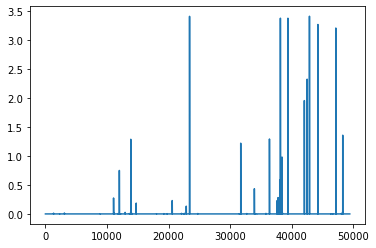

In [14]:
plt.plot(clf.components_[0])

In [15]:
indices = np.argsort(clf.components_[0])
[vocab[i] for i in indices[-15:]]

['richiesta',
 'conoscenza',
 'risarcimento',
 'numero',
 'del',
 'protocollo',
 'vs',
 'sinistro',
 'sollecito',
 'veicolo',
 'targa',
 'sa',
 'riferimento',
 'iter',
 'sped']

In [16]:
clf.reconstruction_err_

347.1326727052627

In [17]:
topic = np.argmax(W1, axis=1)
dataset['topic'] = topic

In [24]:
import pprint
doc_index = 15
pprint.pprint(dataset.iloc[doc_index]['oggetto'])


#vectors_tfidf

'POSTA CERTIFICATA: Richiesta chiarimenti riscatto polizza'


In [25]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col,coo_matrix.data)
    return sorted(tuples,key=lambda x: (x[1],x[0]),reverse=True)

In [26]:
sort_coo(vectors_tfidf[doc_index].tocoo())

[(10284, 0.6829812436896741),
 (38440, 0.6220249033415959),
 (35358, 0.31986426181878785),
 (38035, 0.21049582989243848)]

In [27]:
def extract_topn_from_matrix(features_names,sorted_items,topn=10):
    result = {}
    for idx,score in sorted_items[:topn]:
        word = features_names[idx]
        result[word] = round(score,3)
    return result

In [28]:
keywords = extract_topn_from_matrix(vocab,sort_coo(vectors_tfidf[doc_index].tocoo()))

In [29]:
pprint.pprint(keywords)

{'chiarimenti': 0.683, 'polizza': 0.32, 'richiesta': 0.21, 'riscatto': 0.622}
